<a href="https://colab.research.google.com/github/sgalda/Labs-2023/blob/main/S7_Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Lineal aplicada a datos de automóviles
El conjunto de datos 'auto mpg' es un conjunto clásico que contiene detalles sobre el consumo de combustible (en millas por galón) de diversos modelos de automóviles, junto con otros atributos de esos automóviles. Algunas de las características incluidas son:

1. mpg: Millas por galón.
2. cylinders: Número de cilindros en el motor.
3. displacement: Desplazamiento del motor.
4. horsepower: Caballos de fuerza.
5. weight: Peso del automóvil.
6. acceleration: Aceleración.
7. model_year: Año del modelo.
8. origin: Origen del automóvil.
9. name: Nombre del modelo del automóvil.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carga el conjunto de datos
data = sns.load_dataset('mpg')

# Limpia datos (eliminar filas con valores NaN)
data = data.dropna()

1) visualización de los datos a través de un Gráfico de dispersión

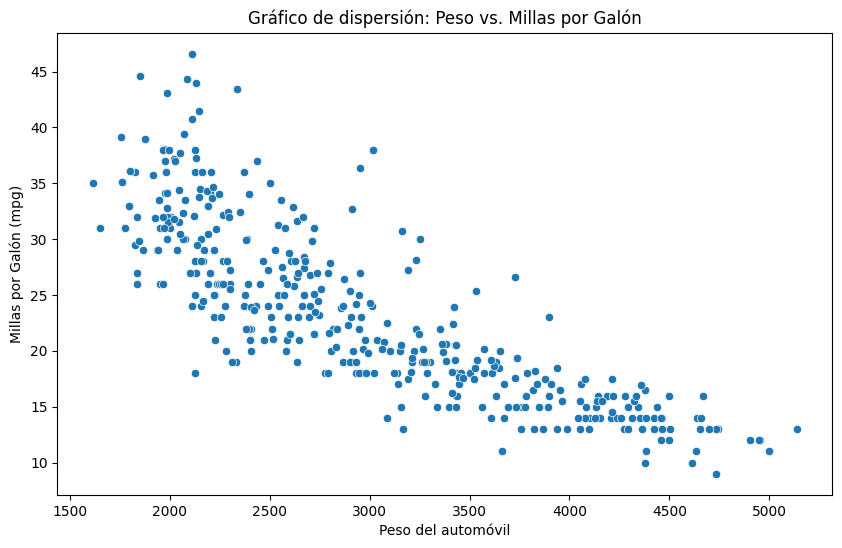

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=data)
plt.title('Gráfico de dispersión: Peso vs. Millas por Galón')
plt.xlabel('Peso del automóvil')
plt.ylabel('Millas por Galón (mpg)')
plt.show()

2) grafico de correlacion para visualizar la dependencia entre los datos

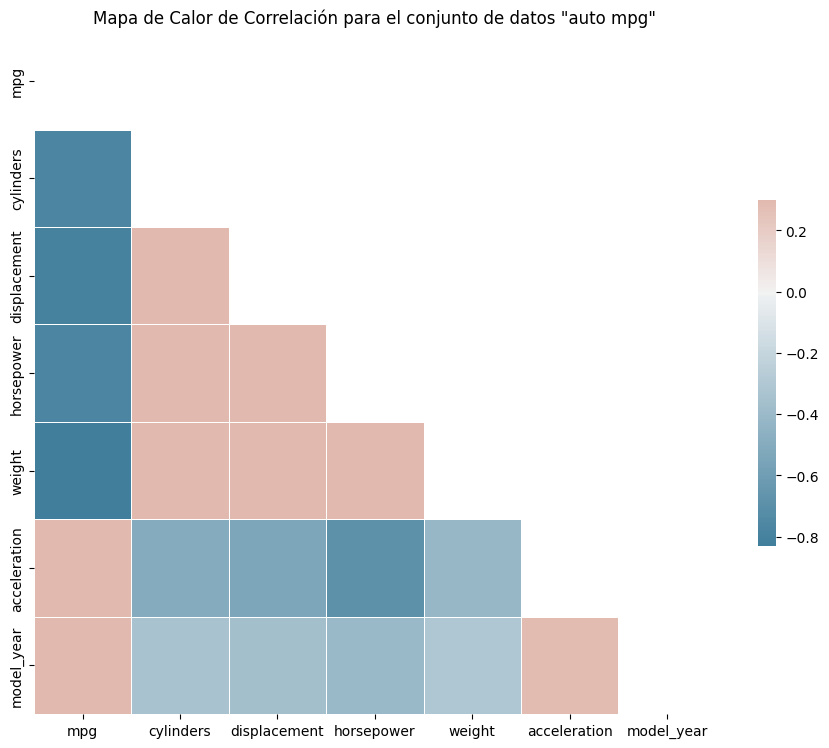

In [14]:
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Calor de Correlación para el conjunto de datos "auto mpg"')
plt.show()

3) modelo de regresion lineal

In [15]:
X = data[['weight']]
y = data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

4) Mostrar estadistiscas de desempeño del modelo

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente: {model.coef_[0]}")
print(f"Intercepto: {model.intercept_}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")


Coeficiente: -0.007903610385225605
Intercepto: 47.200526427552106
Error cuadrático medio (MSE): 17.69
Raíz del error cuadrático medio (RMSE): 4.21
Error absoluto medio (MAE): 3.46
Coeficiente de determinación (R^2): 0.65


5) Mostrar graficamente la lineas rectas en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.

El par de variables con la mayor correlación es: ('cylinders', 'displacement')


<ipython-input-17-c2cc98fac4b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


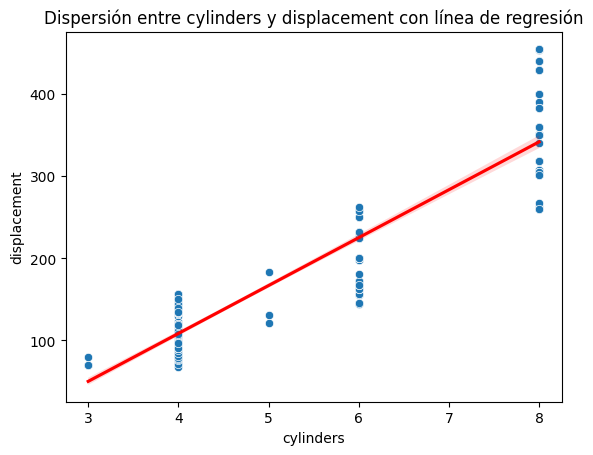

In [17]:
# Calcula la matriz de correlación
correlation_matrix = data.corr()

# se busca el par de variables con la mayor correlación (sin contar la diagonal)
# se reemplaza la diagonal con 0s para no considerar la correlación de una variable consigo misma
np.fill_diagonal(correlation_matrix.values, 0)
max_corr = correlation_matrix.abs().stack().idxmax()

print(f"El par de variables con la mayor correlación es: {max_corr}")

# Crea un gráfico de dispersión para el par de variables más correlacionadas
sns.scatterplot(data=data, x=max_corr[0], y=max_corr[1])

# Añade una línea de regresión
sns.regplot(data=data, x=max_corr[0], y=max_corr[1], scatter=False, color='red')

plt.title(f"Dispersión entre {max_corr[0]} y {max_corr[1]} con línea de regresión")
plt.show()